In [ ]:
!pip install -r requirements.txt

In [ ]:
from huggingface_hub import interpreter_login
interpreter_login()

In [3]:
from PIL import Image, ImageDraw

def image_grid(imgs, rows, cols, factor=1):
    assert len(imgs) == rows*cols

    w = int(imgs[0].size[0]/factor)
    h = int(imgs[0].size[1]/factor)
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        img = img.resize((w,h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import imageio

torch.manual_seed(42)

# model_id = "stabilityai/stable-diffusion-2-1"
model_id = "stabilityai/stable-diffusion-xl-base-1.0"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = DiffusionPipeline.from_pretrained(model_id, 
                                        torch_dtype=torch.float16, 
                                        use_safetensors=True, 
                                        variant="fp16",
                                        add_watermarker = False)
pipe = pipe.to("cuda")

prompt = "High resolution photo of beautiful woman with thick glasses and rainbow colored hat and colorful parrot sitting on her shoulder. Photographic lighting, professional portrait, 4k, blurred background, f2.0"
images = []
num_images_per_prompt=1
num_inference_steps=50

for max_step in range(1,num_inference_steps+1):
    step_images = pipe(prompt=prompt, num_images_per_prompt=num_images_per_prompt, num_inference_steps=max_step).images
    for image in step_images:
        images.append(image)

In [4]:
# Add outputs to grid
grid = image_grid(images, rows=5, cols=10, factor=4)

# Save file
grid.save("steps.png")

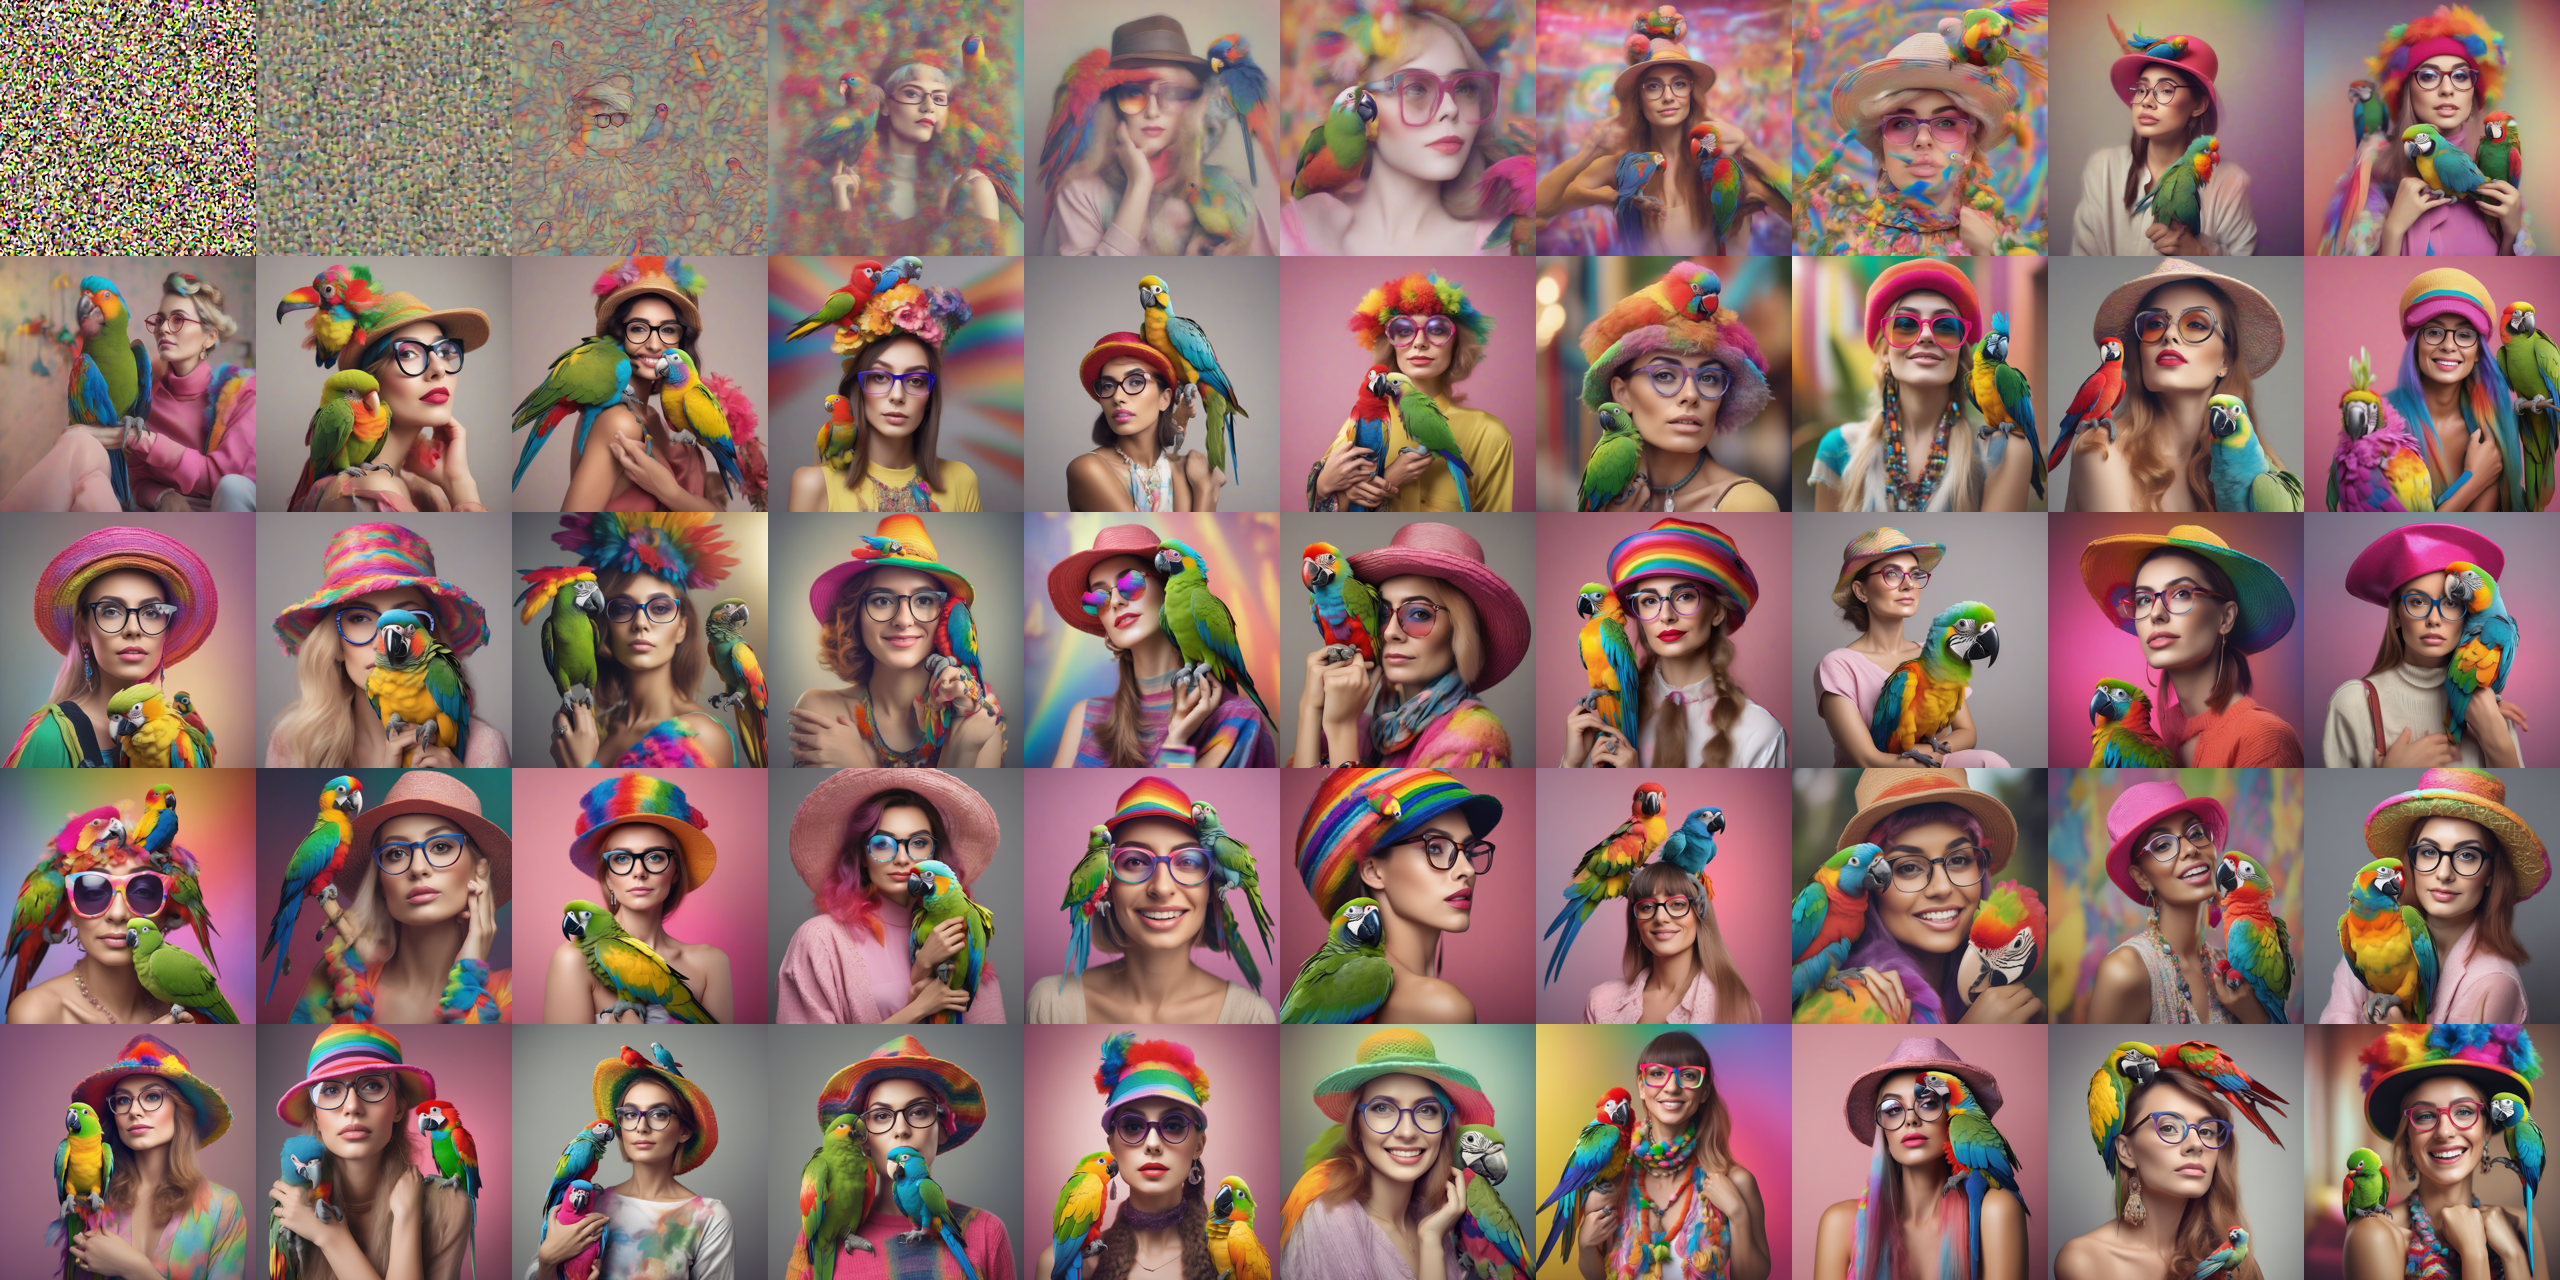

In [5]:
# Display grid in notebook
image = Image.open("steps.png")

# Display the image
image